#### 다중클래스

> 이진 분류를 다중 분류로 
>- one vs rest
>- multinomial to many binomial ... 일대다 방식
>- 클래스 수만큼 이진 분류기 사용
>- 가중치와 절편으로 점수를 내서 가장 높은 클래스 선택
>- svm, logistic, perceptron

> multinomial  
>- softmax 회귀
>- 모든 클래스를 포함해서 계산
>- nb, knn, dt, logistic

multi_class

- over : 이진분류
- multinomial : softmax

- default : auto



In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False  

(100, 2)


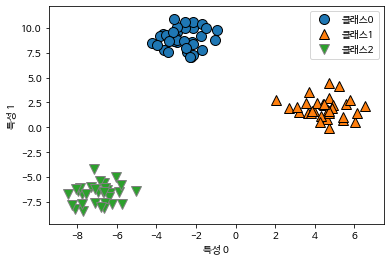

In [38]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)

print(X.shape)

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스0", "클래스1", "클래스2"])

#make blobs 데이터에 대해 영역을 나눠서 그래프를 그림

make blob

- 특성은 2
- 샘플 수는 100
- 클래스는 3

In [25]:
from sklearn.linear_model import LogisticRegression

logr  = LogisticRegression().fit(X,y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

# y의 클래스가 3개 이상이기 때문에 자동으로 멀티클래스로  or multi_class='multinomial' 설정
# 멀티라서 coef도 클래스별 + 각 특성마다 값 생성됨
# intercept도 클래스의 수만큼 생성됨

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


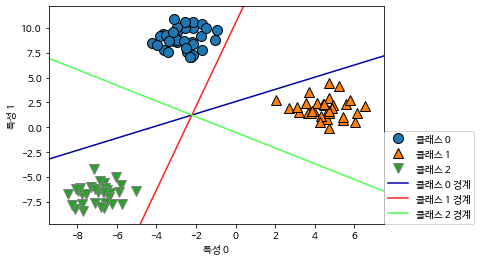

In [26]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)

line = np.linspace(-15,15)

for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c = color)
    

plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", '클래스 0 경계'
           , '클래스 1 경계' , '클래스 2 경계'], loc=(1,0))

# 로지스틱회귀로 구한 coef와 intercept를 이용해서 
# 각각의 클래스 영역만을 분리해서 보여주는 그래프 생성.

[[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]
[[-0.68329705  1.06169509]
 [ 1.36537961 -0.32670774]
 [-0.61161973 -0.73287599]]


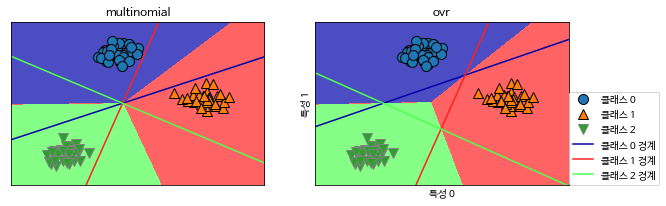

In [27]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

logr_ovr = LogisticRegression(multi_class='ovr').fit(X,y) # ovr 설정. 즉 이진를 이용하겠다는 말. one vs rest!
logr  = LogisticRegression().fit(X,y) # softmax - multinomial

mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=axes[0])
mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=axes[1])
mglearn.plots.plot_2d_classification(logr, X,  fill=True, alpha=.7, ax=axes[0])
mglearn.plots.plot_2d_classification(logr_ovr, X,  fill=True, alpha=.7, ax=axes[1])
line = np.linspace(-15,15)

axes[0].set_title("multinomial")
axes[1].set_title("ovr")
for i, color in zip(range(len(logr.coef_)), mglearn.cm3.colors):
    axes[0].plot(line, -(line*logr.coef_[i][0] + logr.intercept_[i])/logr.coef_[i][1], c = color )
    axes[1].plot(line, -(line*logr_ovr.coef_[i][0] + logr_ovr.intercept_[i])/logr_ovr.coef_[i][1], c = color)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

plt.legend(["클래스 0", "클래스 1", "클래스 2", '클래스 0 경계'
           , '클래스 1 경계' , '클래스 2 경계'], loc=(1,0))

print(logr.coef_)
print(logr_ovr.coef_)

#이진분류에선 plot_2d_separator.. 여긴 plot_2d_classification
#

결과를 보면 multinomial에 비해서 ovr은 가운데 비어있는 영역이 있음..

어느쪽에도 속하지 않는 경우로 
- multinomial은 모든 클래스를 함께 고려하여 결과를 도출하는 반면
- ovr은 각각의 클래스에 대해서만 0, 1 이진으로 구분하기 때문에 생긴 차이

c= 0.0001
[[27  0  0]
 [27  0  0]
 [ 0  0 26]]
[[-0.00027301  0.00502534]
 [ 0.00356259  0.00019223]
 [-0.00328958 -0.00521757]]
[ 0.04502738 -0.09491954  0.04989216]
c= 0.001
[[27  0  0]
 [ 2 25  0]
 [ 0  0 26]]
[[-0.00518066  0.04043342]
 [ 0.03173527 -0.0002556 ]
 [-0.02655461 -0.04017782]]
[-0.0070235  -0.01440195  0.02142545]
c= 1
[[27  0  0]
 [ 0 27  0]
 [ 0  0 26]]
[[-0.29429895  0.52320801]
 [ 0.58927886 -0.14871953]
 [-0.29497991 -0.37448848]]
[-1.27114392  1.63820604 -0.36706212]
c= 10
[[27  0  0]
 [ 0 27  0]
 [ 0  0 26]]
[[-0.47686497  0.74313842]
 [ 0.86542776 -0.23857744]
 [-0.38856279 -0.50456099]]
[-2.05018871  2.44477003 -0.39458133]


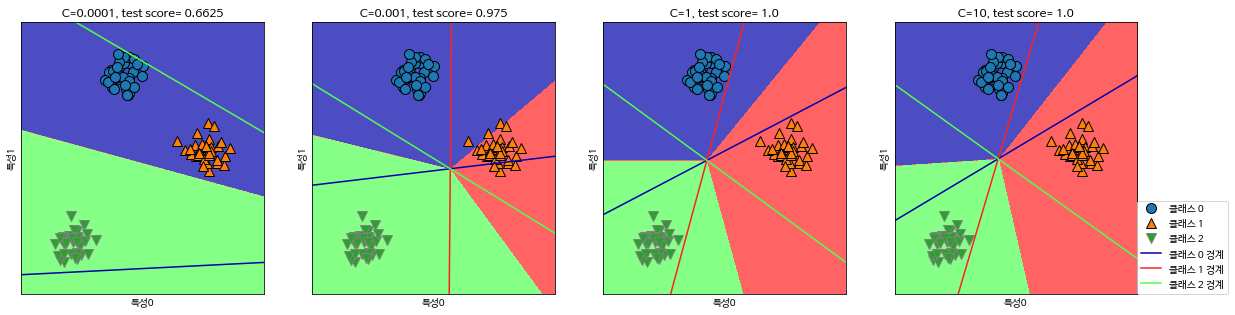

In [29]:
fig, axes = plt.subplots(1,4,figsize=(20,5))

from sklearn.metrics import confusion_matrix
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0, stratify=y, test_size=.8)

line = np.linspace(-15,15)

for ax,c in zip(axes, [0.0001,0.001,1,10]) :
    print("c=",c)
    logr  = LogisticRegression(C=c).fit(X_train,y_train)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    mglearn.plots.plot_2d_classification(logr, X,  fill=True, alpha=.7, ax=ax)
    ax.set_title('C={}, test score= {}'.format(c, logr.score(X_test,y_test)))
    for i, color in zip(range(len(logr.coef_)), mglearn.cm3.colors):
        ax.plot(line, -(line*logr.coef_[i][0] + logr.intercept_[i])/logr.coef_[i][1], c = color )
    
    
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    
    y_pred = logr.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    print(confusion)
    print(logr.coef_)
    print(logr.intercept_)
    
plt.legend(["클래스 0", "클래스 1", "클래스 2", '클래스 0 경계'
           , '클래스 1 경계' , '클래스 2 경계'], loc=(1,0))




Blob 데이터에 대해
- 테스트 사이즈를 극단적으로 0.8로 주어서 관찰..(그 전까지는 모두 완벽하게 구분함)
- C가 0.0001인 경우엔 극단적으로 모든 class1을 class0으로 판단함
- 규제가 심하게 들어가서!

- c=0.0001을 보면 아예 클래스 1을 구분하는 빨간 선이 안 보임..
- test score도 다른 경우에 비교해서 많이 떨어짐
- 클래스 1에 대한 반영이 잘 안됨

#### from sklearn.metrics import confusion_matrix
- 예측 결과에 대해서 클래스별 판단 결과를 보여줌
- 위의 경우 0번째는 0번째 클래스에 대한 이야기
- 그 안에서도 0 1 2로 0,0은 0데이터를 0으로 판단한 것의 수, 0,1은 실제는 0인데 1로 판단한 경우를 카운팅한 결과

Text(0.5, 1.0, 'c값에 따른 test score')

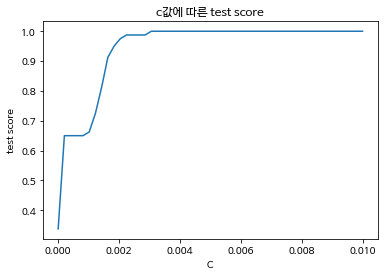

In [7]:
cs = np.linspace(0.000000000000000000000000000000000001,0.01)
score = []

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=.8)

for c in  cs :
    logr  = LogisticRegression(C=c).fit(X_train,y_train)
    score.append(logr.score(X_test, y_test))
    
plt.plot(cs, np.array(score).reshape(-1,1))
plt.xlabel("C")
plt.ylabel("test score")
plt.title("c값에 따른 test score")

분류가 잘 되는 편이라 극단적인 testsize = 0.8을 주고 결과를 보았음

- c는 작을수록 큰 규제를 하는 편
- c가 0.003정도로만 되어도 테스트 점수가 1이 될 정도로 분류가 잘 됨
- 특히 실제 데이터가 섞이지 않고 딱 분류되어 있어서 웬만하면 결과가 잘 나오는 것으로 보임

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=.4)

logr = LogisticRegression(multi_class='multinomial',max_iter=5000).fit(X,y).fit(X_train,y_train)
y_pred = logr.predict(X_test)

print(" iris class = ", load_iris().target_names)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

print("테스트 세트 정확도: {:.2f}".format(logr.score(X_test, y_test)))
print("num of misabled points out of a total %d points : %d"%(X_test.shape[0], (y_test!=y_pred).sum()))

# iris의 3가지 클래스에 대해서 multinomial로 실행하여 본 결과
# versicolor을 virginica로 분류한 것 1개
# virginica를 versicolor로 잘못분류한 것 4가지 해서 총 60 샘플에 대해서 5개 분류를 잘못함

#y_test != y_pred 가 같지 않은 경우를 count해서 점수를 가져옴

 iris class =  ['setosa' 'versicolor' 'virginica']
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
테스트 세트 정확도: 0.92
num of misabled points out of a total 60 points : 5


In [9]:
logr_ovr = LogisticRegression(multi_class='ovr', max_iter=5000).fit(X_train,y_train)
y_pred = logr_ovr.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

print("테스트 세트 정확도: {:.2f}".format(logr_ovr.score(X_test, y_test)))
print("num of misabled points out of a total %d points : %d"%(X_test.shape[0], (y_test!=y_pred).sum()))

# 위의 테스트를 ovr로 실행한 결과.
# ovr보다 multi가 더 좋은 결과를..

[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]
테스트 세트 정확도: 0.90
num of misabled points out of a total 60 points : 6


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 2)
multinomial nErrors =  27
ovr nErrors =  29


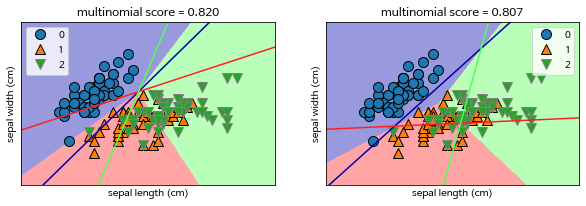

In [41]:
X = load_iris().data
y = load_iris().target

fig, axes = plt.subplots(1,2,figsize=(10,3))

names = load_iris().feature_names
X = X[:,0:2]
print(names)
print(X.shape)


#특성 0과 1을 이용해서 분류해보기

logr = LogisticRegression().fit(X,y)
logr_ovr = LogisticRegression(multi_class='ovr').fit(X,y)

for ax in axes:
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    ax.legend()


#잘못 분류한 경우들     
print("multinomial nErrors = ", (logr.predict(X)!=y).sum() )
print("ovr nErrors = ", (logr_ovr.predict(X)!=y).sum() )

#결과 플롯으로 출력

mglearn.plots.plot_2d_classification(logr, X, alpha=.4, fill=True, ax=axes[0])
mglearn.plots.plot_2d_classification(logr_ovr, X, alpha=.4, fill=True, ax=axes[1])

axes[0].set_title("multinomial score = {:.3f}".format(logr.score(X,y)))
axes[1].set_title("multinomial score = {:.3f}".format(logr_ovr.score(X,y)))

line = np.linspace(0,15)
for i,c in zip(range(len(logr.coef_)), mglearn.cm3.colors):
    axes[0].plot(line, -(line*logr.coef_[i][0] + logr.intercept_[i])/logr.coef_[i][1] , label = i, color=c)
    axes[1].plot(line, -(line*logr_ovr.coef_[i][0] + logr_ovr.intercept_[i])/logr_ovr.coef_[i][1] , label = i, color=c)


iris의 특성 두 가지를 섞어서 테스트를 함. - 꽃받침의 길이와 너비

그래프를 보니 거의 비슷하나 multinomial이 조금 더 성능이 좋은 것을 확인할 수 있다.